In [1]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries needed
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt 

# Load the dataset
data = pd.read_csv("forestfires.csv")

# Display the first rows
print(data.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [5]:
# Drop irrelevant columns like "day" and "month"
data = data.drop(columns=["day", "month"], axis=1)

# Rename columns for better clarity
data = data.rename(columns={
    "RH": "Relative_Humidity",
    "temp": "Temperature",
    "rain": "Rainfall",
    "wind": "Wind",
    "area": "Burned_Area"
})

# Replace zeros in 'Burned_Area' with NaN for analysis
data["Burned_Area"] = data["Burned_Area"].replace(0, np.nan)

# Print the data summary
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  517 non-null    int64  
 1   Y                  517 non-null    int64  
 2   FFMC               517 non-null    float64
 3   DMC                517 non-null    float64
 4   DC                 517 non-null    float64
 5   ISI                517 non-null    float64
 6   Temperature        517 non-null    float64
 7   Relative_Humidity  517 non-null    int64  
 8   Wind               517 non-null    float64
 9   Rainfall           517 non-null    float64
 10  Burned_Area        270 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 44.6 KB
None


In [6]:
# Create a new column categorizing fire size
data["Fire_Category"] = pd.cut(
    data["Burned_Area"],
    bins=[0, 1, 10, 100, np.inf],
    labels=["Small", "Medium", "Large", "Huge"]
)

# Calculate a combined weather index (Relative Humidity / Wind)
data["Weather_Index"] = data["Relative_Humidity"] / data["Wind"]

# Display the transformed dataset
print(data.head())


   X  Y  FFMC   DMC     DC  ISI  Temperature  Relative_Humidity  Wind  \
0  7  5  86.2  26.2   94.3  5.1          8.2                 51   6.7   
1  7  4  90.6  35.4  669.1  6.7         18.0                 33   0.9   
2  7  4  90.6  43.7  686.9  6.7         14.6                 33   1.3   
3  8  6  91.7  33.3   77.5  9.0          8.3                 97   4.0   
4  8  6  89.3  51.3  102.2  9.6         11.4                 99   1.8   

   Rainfall  Burned_Area Fire_Category  Weather_Index  
0       0.0          NaN           NaN       7.611940  
1       0.0          NaN           NaN      36.666667  
2       0.0          NaN           NaN      25.384615  
3       0.2          NaN           NaN      24.250000  
4       0.0          NaN           NaN      55.000000  


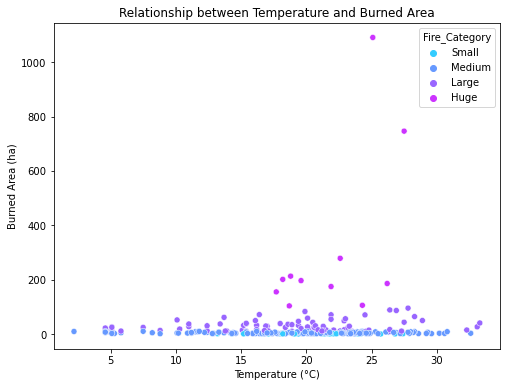

In [7]:
# Visualization 1: Relationship between Temperature and Burned Area
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Temperature", y="Burned_Area", hue="Fire_Category", palette="cool")
plt.title("Relationship between Temperature and Burned Area")
plt.xlabel("Temperature (°C)")
plt.ylabel("Burned Area (ha)")
plt.show()

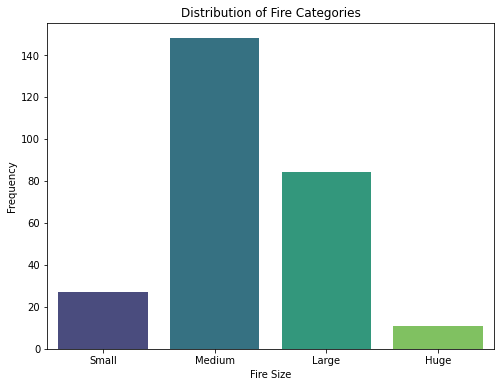

In [8]:
# Visualization 2: Distribution of Fire Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Fire_Category", palette="viridis")
plt.title("Distribution of Fire Categories")
plt.xlabel("Fire Size")
plt.ylabel("Frequency")
plt.show()

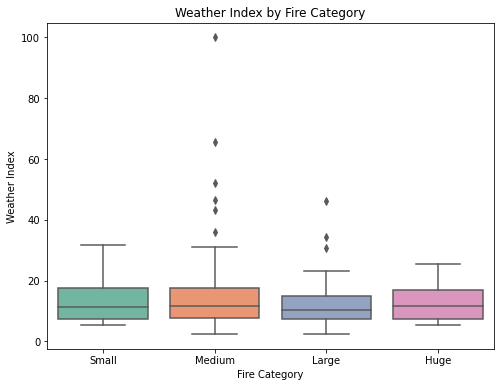

In [9]:
# Visualization 3: Relationship between Weather Index and Burned Area
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Fire_Category", y="Weather_Index", palette="Set2")
plt.title("Weather Index by Fire Category")
plt.xlabel("Fire Category")
plt.ylabel("Weather Index")
plt.show()

In [10]:
# Save the transformed dataset to a new CSV file
data.to_csv("transformed_forestfires.csv", index=False)